In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


##### Binary Classification

In [2]:
# No use of user id so drop it
df = df.drop(["User ID"],axis = 'columns')
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [3]:
# Need to encode the Gender attribute
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


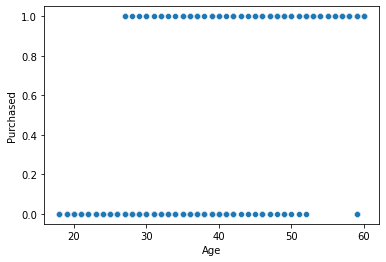

In [4]:
sns.scatterplot(x = df["Age"],y = df["Purchased"])
plt.show()

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Purchased'>

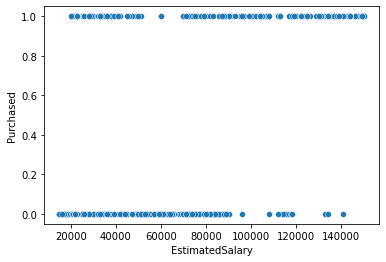

In [5]:
sns.scatterplot(x = df["EstimatedSalary"],y = df["Purchased"])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>

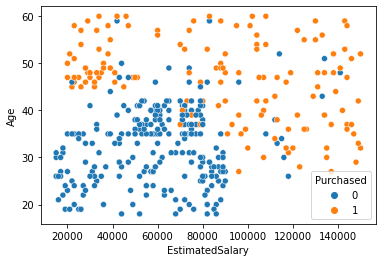

In [6]:
sns.scatterplot(x = df["EstimatedSalary"],y = df["Age"],hue = df["Purchased"])

In [7]:
from sklearn.model_selection import train_test_split
df = df.drop(['Gender'],axis = 'columns')
X = df.drop(['Purchased'],axis = 'columns')
y = df["Purchased"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Age,EstimatedSalary
3,27,57000
18,46,28000
202,39,134000
250,44,39000
274,57,26000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [9]:
model.score(X_test,y_test)

0.65

In [12]:
# Gender	Age	EstimatedSalary
model.predict([[65,120000]])

array([0], dtype=int64)

##### Multiclass Classification

In [35]:
df = pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [36]:
df.groupby("Drug").size()

Drug
DrugY    91
drugA    23
drugB    16
drugC    16
drugX    54
dtype: int64

In [37]:
# need to encode the sex attribute
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [38]:
from sklearn.model_selection import train_test_split
X = df.drop(['Drug'],axis = 'columns')
y = df['Drug']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [41]:
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.75

###### Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[14,  1,  0,  0,  1],
       [ 4,  2,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 4,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  9]], dtype=int64)

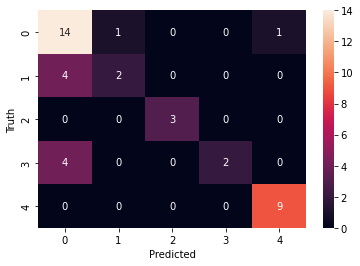

In [48]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()